In [1]:
import pandas as pd
import numpy as np

names = open('names.txt', 'r').read().splitlines()

In [2]:
names = np.array(names, dtype=np.str_)
names[:5]

array(['en', 'anastasia', 'kayla', 'alyssa', 'juliana'], dtype='<U15')

In [3]:
len(names)

32033

In [4]:
# np.argmin(names) -> This does not work as we cannot give argmin a func to calcualte norm of the entries

# we need to vectorize with a norm func before calculating argmin or argmax

sizes = np.vectorize(len)(names)
min_name = np.argmin(sizes)
max_name = np.argmax(sizes)
print(names[min_name], "index:", min_name)
print(names[max_name], "index:", max_name)

en index: 0
muhammadibrahim index: 12701


In [5]:
# we will only look at previous character to predict the next character.
# we will ignore the context stored in previous characters for now .

In [6]:
for name in names[:5]:
    chars = "<" + name + ">"  # < start of name and > for end of name
    for eg, resp in zip(chars, chars[1:]):
        print(eg, resp)

< e
e n
n >
< a
a n
n a
a s
s t
t a
a s
s i
i a
a >
< k
k a
a y
y l
l a
a >
< a
a l
l y
y s
s s
s a
a >
< j
j u
u l
l i
i a
a n
n a
a >


In [7]:
# The simplest way is to see the statistic of how many times we get the same bigram
# that is the same example and response pair

stats = dict()
for name in names:
    chars = "<" + name + ">"  # < start of name and > for end of name
    for eg, resp in zip(chars, chars[1:]):
        bigram = (eg, resp)
        stats[bigram] = stats.get(bigram, 0) + 1
stats

{('<', 'e'): 1531,
 ('e', 'n'): 2676,
 ('n', '>'): 6763,
 ('<', 'a'): 4410,
 ('a', 'n'): 5438,
 ('n', 'a'): 2979,
 ('a', 's'): 1118,
 ('s', 't'): 765,
 ('t', 'a'): 1027,
 ('s', 'i'): 684,
 ('i', 'a'): 2445,
 ('a', '>'): 6640,
 ('<', 'k'): 2963,
 ('k', 'a'): 1731,
 ('a', 'y'): 2050,
 ('y', 'l'): 1104,
 ('l', 'a'): 2623,
 ('a', 'l'): 2529,
 ('l', 'y'): 1588,
 ('y', 's'): 401,
 ('s', 's'): 461,
 ('s', 'a'): 1201,
 ('<', 'j'): 2422,
 ('j', 'u'): 202,
 ('u', 'l'): 300,
 ('l', 'i'): 2480,
 ('<', 'c'): 1542,
 ('c', 'h'): 663,
 ('h', 'a'): 2243,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('i', 'e'): 1652,
 ('e', '>'): 3983,
 ('e', 's'): 861,
 ('t', 'h'): 647,
 ('h', 'e'): 674,
 ('e', 'r'): 1958,
 ('r', '>'): 1377,
 ('r', 'i'): 3033,
 ('e', 'l'): 3248,
 ('l', '>'): 1313,
 ('c', 'e'): 552,
 ('e', 'c'): 153,
 ('c', 'i'): 271,
 ('i', 'l'): 1345,
 ('<', 'v'): 376,
 ('v', 'a'): 642,
 ('l', 'e'): 2922,
 ('i', 'n'): 2126,
 ('<', 'm'): 2538,
 ('m', 'o'): 452,
 ('o', 'l'): 619,
 ('l', 'l'): 1345,
 ('y', '>')

In [8]:
stats_df = pd.DataFrame.from_dict(stats, orient="index", columns=[
                                  "counts"]).sort_values("counts", ascending=False)
stats_df

,counts
"(n, >)",6763
"(a, >)",6640
"(a, n)",5438
"(<, a)",4410
"(e, >)",3983
...,...
"(v, d)",1
"(x, n)",1
"(s, q)",1
"(x, m)",1


In [9]:
import torch

In [11]:
a = torch.zeros(3,5,dtype=torch.int32)
a , a.dtype

(tensor([[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]], dtype=torch.int32),
 torch.int32)

In [12]:
a[1,3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [13]:
N = torch.zeros(28,28,dtype=torch.int32)

In [19]:
chars = sorted(list(set("".join(names))))
# lookup table
stoi = {s:i for i,s in enumerate(chars)}
# special chars
stoi["<"]=26
stoi[">"]=27


In [26]:
itos = {i:s for i,s in zip(stoi.values(), stoi.keys())}


In [20]:
for name in names:
    name = "<" + name + ">"
    for c1,c2 in zip(name,name[1:]):
        N[stoi[c1], stoi[c2]] += 1 

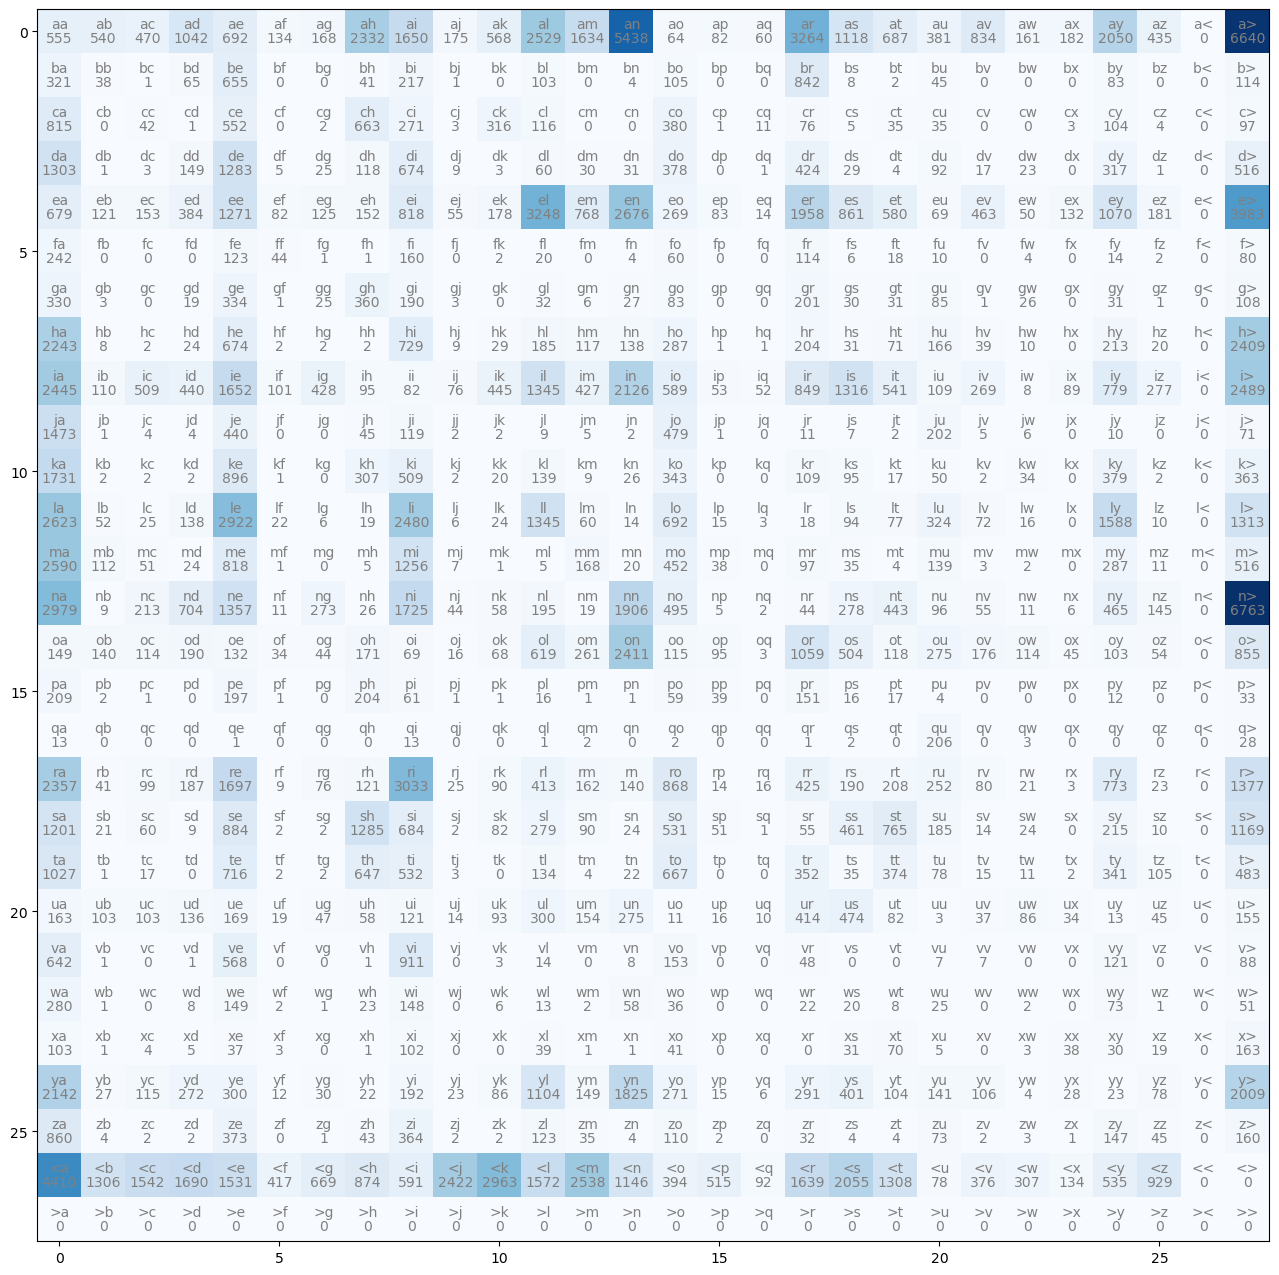

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(N,cmap="Blues")

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
        plt.text(j,i,N[i,j].item(),ha="center",va="top",color="gray")


In [28]:
N[26,:] # the names starts with

tensor([4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963, 1572,
        2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,  134,
         535,  929,    0,    0], dtype=torch.int32)

In [33]:
# these are the raw counts .
# lets convert this into probs
p = N[26].float()
p = p/p.sum(axis=0) # here its only 1 axis but i want to be explicit 
p

tensor([0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273, 0.0184,
        0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029, 0.0512,
        0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290, 0.0000,
        0.0000])

In [39]:
# we can start sampling from these
g = torch.Generator().manual_seed(10)
sample_idx = torch.multinomial(p,replacement=True,num_samples=1,generator=g).item()
print(sample_idx,itos[sample_idx])

12 m


In [40]:
# that is this time m followed < (start of name)

In [41]:
# and now we need to look at the row m . where we have the distribution for the next character... and so on

In [49]:
# so now we can start writing our algorithm for generation
# start_index = 26 , end_index = 27 <- remember

prediction = list()
ix = 26
# seed with the start char
prediction.append(itos.get(ix))
while True:
    
    if ix==27:
        break
    
    # get the distribution of the following character from the previous index's row    
    p = N[ix].float()
    p = p/p.sum()
    
    # predicted next char
    ix = torch.multinomial(p,replacement=True,num_samples=1,generator=g).item()
    char = itos[ix]
    prediction.append(char)
    
print(*prediction)
    

< d g h >


In [59]:
# but its just better to store the freq table above as prob table.
P = N.float()
P /=P.sum(1,keepdims=True) # 28,28/ 28,1 ?

# broadcasting rule:
# align all the element to the right.
# each dimension has atleast one dimension
# when iterating over the dimesion size , starting at the trailing dimension , the dimension sizes must either be equal , one of them is 1 , or one of them does not exist

In [60]:
# 28,28
# 28 ,1 -> copies column vector to other 27 columns to make it 28,28 and then does hadamard on both matrices

In [62]:
# so now we can start writing our algorithm for generation
# start_index = 26 , end_index = 27 <- remember

prediction = list()
ix = 26
# seed with the start char
prediction.append(itos.get(ix))
while True:

    if ix==27:
        break

    # get the distribution of the following character from the previous index's row    
    p = P[ix]

    # predicted next char
    ix = torch.multinomial(p,replacement=True,num_samples=1,generator=g).item()
    char = itos[ix]
    prediction.append(char)

print(*prediction)
    

< b i f a n >


In [63]:
# important note on what happens when u take off keepdims @ 45th minute

In [66]:
# we have to summarize the quality of the model.. (loss)

for name in names[:5]:
    name = "<" + name + ">"
    for c1, c2 in zip(name,name[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        prob = P[ix1,ix2]
        print(f"{c1}{c2} : prob {prob:.3f}")


<e : prob 0.048
en : prob 0.131
n> : prob 0.369
<a : prob 0.138
an : prob 0.160
na : prob 0.163
as : prob 0.033
st : prob 0.094
ta : prob 0.184
as : prob 0.033
si : prob 0.084
ia : prob 0.138
a> : prob 0.196
<k : prob 0.092
ka : prob 0.343
ay : prob 0.060
yl : prob 0.113
la : prob 0.188
a> : prob 0.196
<a : prob 0.138
al : prob 0.075
ly : prob 0.114
ys : prob 0.041
ss : prob 0.057
sa : prob 0.148
a> : prob 0.196
<j : prob 0.076
ju : prob 0.070
ul : prob 0.096
li : prob 0.178
ia : prob 0.138
an : prob 0.160
na : prob 0.163
a> : prob 0.196


In [67]:
# these are the prob ..
# if each were equally likely then prob of a char following another character would just be 1/28

1/28

0.03571428571428571

In [68]:
# so anything differing from 3.5 percent that implies we are learning useful information from the statistic

In [72]:
# maximum likelihood estimation 
# the likelihood is the prod of the prob. and that is a measure of quality. the product should be really high

# we work with log likelihood that also stops from underflowing the products

# we have to summarize the quality of the model.. (loss)
# logprob(a * b * c) = log(a) + log(b) + log(c)
log_likelihood = 0
for name in names[:3]:
    name = "<" + name + ">"
    for c1, c2 in zip(name,name[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f"{c1}{c2} : prob {prob:.3f} , : logprob {logprob}")
        
neg_log_likelihood = -1 * log_likelihood
loss = neg_log_likelihood/5
print(loss)

<e : prob 0.048 , : logprob -3.0408456325531006
en : prob 0.131 , : logprob -2.0323386192321777
n> : prob 0.369 , : logprob -0.9969088435173035
<a : prob 0.138 , : logprob -1.9828919172286987
an : prob 0.160 , : logprob -1.8295611143112183
na : prob 0.163 , : logprob -1.8167877197265625
as : prob 0.033 , : logprob -3.411431074142456
st : prob 0.094 , : logprob -2.3604838848114014
ta : prob 0.184 , : logprob -1.6907531023025513
as : prob 0.033 , : logprob -3.411431074142456
si : prob 0.084 , : logprob -2.4724018573760986
ia : prob 0.138 , : logprob -1.9795759916305542
a> : prob 0.196 , : logprob -1.629860520362854
<k : prob 0.092 , : logprob -2.3805644512176514
ka : prob 0.343 , : logprob -1.068706750869751
ay : prob 0.060 , : logprob -2.8051326274871826
yl : prob 0.113 , : logprob -2.18099045753479
la : prob 0.188 , : logprob -1.6717342138290405
a> : prob 0.196 , : logprob -1.629860520362854
tensor(8.0785)


In [123]:
# instead of pure stats .. lets see what we could do with a deep neural network

eg_inp = []
eg_rsp = []

for name in names:
    name = "<" + name + ">"
    for c1 ,c2 in zip(name,name[1:]):
        eg_inp.append(stoi[c1])
        eg_rsp.append(stoi[c2])
        
# neural networks
eg_inp = torch.tensor(eg_inp)
eg_rsp = torch.tensor(eg_rsp)

In [124]:
eg_inp, eg_rsp

(tensor([26,  4, 13,  ..., 17, 18, 24]),
 tensor([ 4, 13, 27,  ..., 18, 24, 27]))

In [125]:
# but we need this one hot encoded
import torch.nn.functional as F
eg_inp =  F.one_hot(eg_inp,num_classes= 28).float()
eg_rsp =  eg_rsp # dont have to one hot encode this .. 


In [126]:
eg_inp.shape # each row is an example . example representation in R28

torch.Size([228146, 28])

In [127]:
# we want them to be in float tho.. 
# but one hot does not take output dtype .
# so we're going to have to manually cast this

eg_inp.dtype

torch.float32

In [128]:
W = torch.randn(28,1) # so if W was being left multiplied (default) then it maps R28:->R1. 
# but that assumes we have each example as a column vector . Here we have it as row .
# so its more popular to keep examples on the left in rows and multiply the weights on the right
# so every example would get multiplied by these weights and each example will have R1 rep after the operation
out1 = eg_inp @ W # each example dotted with weights
out1

tensor([[ 1.2274],
        [ 1.1288],
        [ 0.4437],
        ...,
        [ 0.8034],
        [-0.5059],
        [ 0.2366]])

In [181]:
# but we can keep the first representation to be in 28 dims too.. and we can imagine each row representing a prob for next char generation 
W = torch.randn(28,28, requires_grad=True,generator=g) # you could imagine it as each neuron col stacked.

In [202]:
# forward pass
out2 = eg_inp @ W # logits.. interpret them to be log counts. (As it is bot + and -)
print(out2.shape)

torch.Size([228146, 28])


In [203]:
counts = torch.exp(out2) # now they will never be negative. kinda like counts but we dont care if they are not integers . because we need 
prob = counts/counts.sum(1,keepdims= True)
# prob.sum(axis=1,keepdims=True). that is softmaxing z's .. our logits

In [204]:
# but we are going to make just a simple linear layer model . without any non lin activation.. for now

In [205]:
# we compare the label loss with the predicted loss
# for first example
prob[0,eg_rsp[0].item()] # which is a terrible guess

tensor(0.0400, grad_fn=<SelectBackward0>)

In [206]:
# probability of the correct label being guessed for the first 5 example
prob[torch.arange(1,6)  , eg_rsp[:5]]

tensor([0.0094, 0.1030, 0.0570, 0.0215, 0.1030], grad_fn=<IndexBackward0>)

In [207]:
# so the negative mean likelihood would be
n_examples = eg_rsp.shape[0]
loss = -1 * prob[torch.arange(1,6)  , eg_rsp[:5]].log().mean()
loss

tensor(3.1828, grad_fn=<MulBackward0>)

In [208]:
loss

tensor(3.1828, grad_fn=<MulBackward0>)

In [209]:
# backward pass 
W.grad = None # better way tot set to 0
loss.backward()

In [210]:
W.grad # now after being bakpropogated

tensor([[-0.1957,  0.0080,  0.0020,  0.0035,  0.0075,  0.0099,  0.0020,  0.0025,
          0.0065,  0.0006,  0.0047,  0.0043,  0.0036,  0.0069,  0.0202,  0.0080,
          0.0043,  0.0021,  0.0074,  0.0274,  0.0111,  0.0046,  0.0040,  0.0067,
          0.0248,  0.0043,  0.0076,  0.0012],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [211]:
W.data += -0.1 * W.grad

In [212]:
# go re-run from forward pass till the learning cell (prev cell)..

# or we could make a loop

In [227]:
g = torch.Generator().manual_seed(1)
W = torch.randn(28,28, generator=g,requires_grad=True) # only learnable parameter
for epoch in range(5):
    print(f"Epoch {epoch}")
    
    # forward pass
    logit = eg_inp @ W
    counts = logit.exp()
    prob = counts/counts.sum(1,keepdims=True)
    
    # compare predicted response with true labels
    loss = -1 * prob[torch.arange(n_examples),eg_rsp].log().mean()
    print(loss)
    
    # backpropogate and learning step
    W.grad = None # flush it first
    loss.backward() # backprop
    W.data -= - 0.1 * W.grad # learning step

Epoch 0
tensor(3.7047, grad_fn=<MulBackward0>)
Epoch 1
tensor(3.7054, grad_fn=<MulBackward0>)
Epoch 2
tensor(3.7061, grad_fn=<MulBackward0>)
Epoch 3
tensor(3.7069, grad_fn=<MulBackward0>)
Epoch 4
tensor(3.7076, grad_fn=<MulBackward0>)


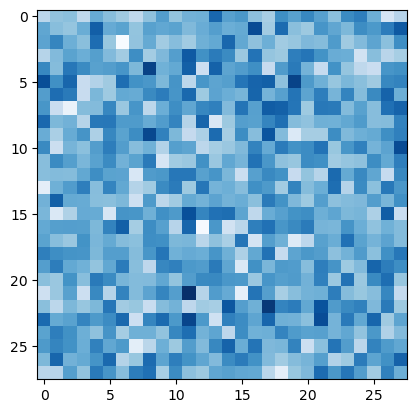

In [230]:
plt.imshow(W.detach(),cmap="Blues")

In [248]:
# how to get prediction out of this ? 

idx = 26
prediction = []
prediction.append(itos[idx])
while idx != 27:
    x = F.one_hot(torch.tensor([idx]),num_classes=28).float()
    logits = x @ W
    counts = logits.exp()
    p = counts/counts.sum(axis=1,keepdims=True)
    idx = torch.multinomial(p, num_samples=1,replacement=True)
    prediction.append(itos[ idx.item()])
print(*prediction)

< b f o e n r c w q g l g l q < j j p m >
